In [1]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing Errors

A basic errorbar can be created with a single Matplotlib function call

In [5]:
plt.style.use('seaborn-whitegrid')

In [6]:
x=np.linspace(0,10,50)

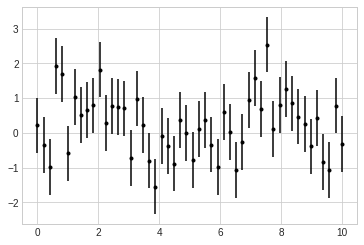

In [9]:
dy=0.8
y=np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt=".k");

In addition to these basic options, the errorbar function has many options to fine tune the outputs. Using these additional options you can easily customize the aesthetics of your errorbar plot.

<ErrorbarContainer object of 3 artists>

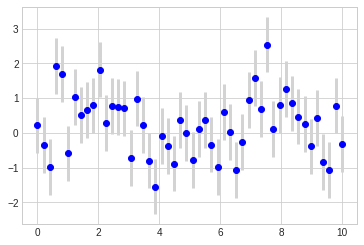

In [10]:
plt.errorbar(x,y,yerr=dy,fmt="o",color="blue",ecolor="lightgray",elinewidth=3,capsize=0)

# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using
contours or color-coded regions. There are three Matplotlib functions that can be
helpful for this task: plt.contour for contour plots, plt.contourf for filled contour
plots, and plt.imshow for showing images

# Visualizing a Three-Dimensional Function
We’ll start by demonstrating a contour plot using a function z = f x, y , using the fol‐
lowing particular choice for f

In [11]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the plt.contour function. It takes three argu‐
ments: a grid of x values, a grid of y values, and a grid of z values. The x and y values
represent positions on the plot, and the z values will be represented by the contour
levels. Perhaps the most straightforward way to prepare such data is to use the
np.meshgrid function, which builds two-dimensional grids from one-dimensional
arrays

In [12]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let’s look at this with a standard line-only contour plot

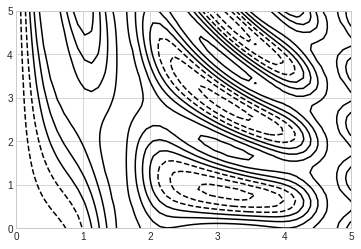

In [13]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by
dashed lines, and positive values by solid lines. Alternatively, you can color-code the
lines by specifying a colormap with the cmap argument. Here, we’ll also specify that
we want more lines to be drawn—20 equally spaced intervals within the data range

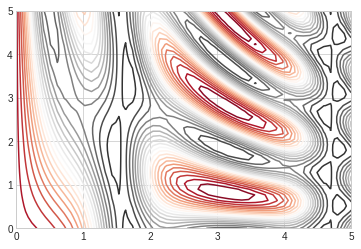

In [14]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the RdGy (short for Red-Gray) colormap, which is a good choice for
centered data. Matplotlib has a wide range of colormaps available, which you can
easily browse in IPython by doing a tab completion on the plt.cm module

the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the plt.contourf()
function

Additionally, we’ll add a plt.colorbar() command, which automatically creates an
additional axis with labeled color information for the plot

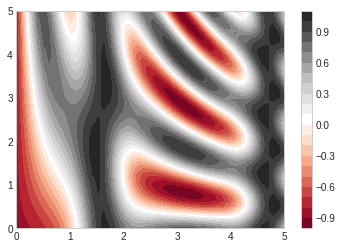

In [16]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are “peaks,” while the red regions
are “valleys.”
One potential issue with this plot is that it is a bit “splotchy.” That is, the color steps
are discrete rather than continuous, which is not always what is desired. You could
remedy this by setting the number of contours to a very high number, but this results
in a rather inefficient plot: Matplotlib must render a new polygon for each step in the
level. A better way to handle this is to use the plt.imshow() function, which inter‐
prets a two-dimensional grid of data as an image

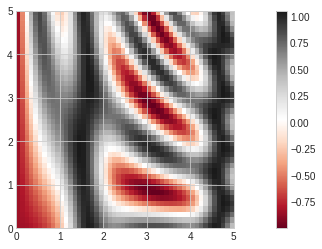

In [20]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis('image');

There are a few potential gotchas with imshow() , however:
• plt.imshow() doesn’t accept an x and y grid, so you must manually specify the
extent [xmin, xmax, ymin, ymax] of the image on the plot.
• plt.imshow() by default follows the standard image array definition where the
origin is in the upper left, not in the lower left as in most contour plots. This
must be changed when showing gridded data.

• plt.imshow() will automatically adjust the axis aspect ratio to match the input
data; you can change this by setting, for example, plt.axis(aspect='image') to
make x and y units match.

Finally, it can sometimes be useful to combine contour plots and image plots. For
example, to create the effect shown in Figure 4-34, we’ll use a partially transparent
background image (with transparency set via the alpha parameter) and over-plot
contours with labels on the contours themselves (using the plt.clabel() function):

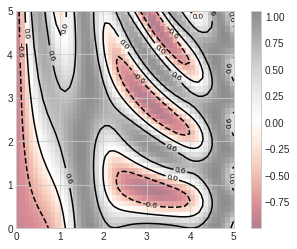

In [21]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

# Thank You